In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [51]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [53]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [54]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 62s 38ms/step - loss: 1.5212 - accuracy: 0.4428 - val_loss: 1.3605 - val_accuracy: 0.5203
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1270 - accuracy: 0.6027 - val_loss: 1.0644 - val_accuracy: 0.6281
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9670 - accuracy: 0.6576 - val_loss: 0.9167 - val_accuracy: 0.6804
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8786 - accuracy: 0.6898 - val_loss: 0.8906 - val_accuracy: 0.6921
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8067 - accuracy: 0.7142 - val_loss: 0.8845 - val_accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7536 - accuracy: 0.7346 - val_loss: 0.8499 - val_accuracy: 0.7078
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7050 - accuracy: 0.7507 - val_loss: 0.8572 -

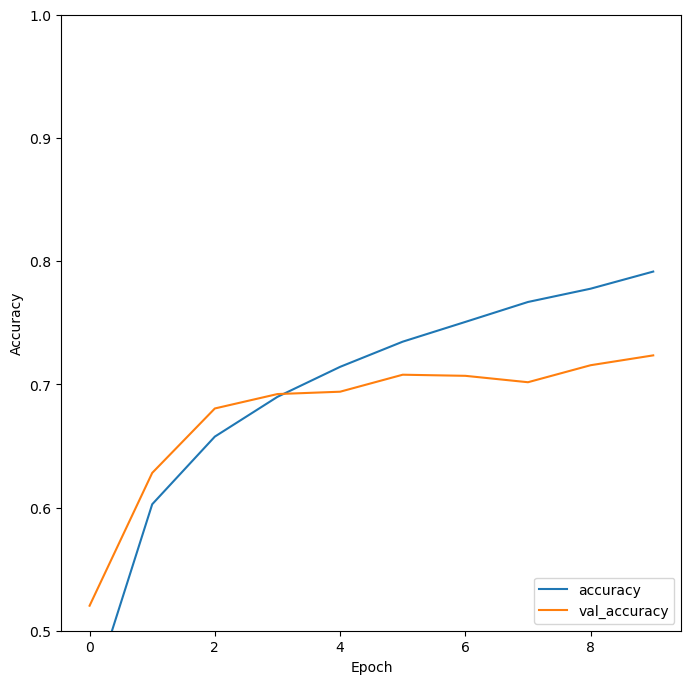

In [56]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")

In [57]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [58]:
X_test.shape

(10000, 32, 32, 3)

In [59]:
y_train.shape

(50000, 1)

In [60]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [61]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [62]:
y_test = y_test.reshape(-1,)

In [63]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [64]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [65]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [66]:
ann = keras.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.8139 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6245 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5397 - accuracy: 0.4579
Epoch 4/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4808 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.4295 - accuracy: 0.4985


In [67]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.51      0.55      1000
           1       0.68      0.57      0.62      1000
           2       0.46      0.22      0.30      1000
           3       0.33      0.42      0.37      1000
           4       0.50      0.35      0.41      1000
           5       0.42      0.36      0.39      1000
           6       0.42      0.72      0.53      1000
           7       0.53      0.57      0.55      1000
           8       0.53      0.71      0.61      1000
           9       0.61      0.51      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



In [68]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [69]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4662 - accuracy: 0.4756
Epoch 2/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.1173 - accuracy: 0.6108
Epoch 3/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9995 - accuracy: 0.6515
Epoch 4/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9191 - accuracy: 0.6816
Epoch 5/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8532 - accuracy: 0.7049
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7947 - accuracy: 0.7253
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7439 - accuracy: 0.7427
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7006 - accuracy: 0.7567
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6626 - accuracy: 0.7691
Epoch 10/10
1563/1563 [==============================] - 49s 32m

In [71]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9513 - accuracy: 0.6855


[0.9513235092163086, 0.6855000257492065]

In [72]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[9.6543465e-04, 6.2104788e-05, 5.0258730e-04, 8.8208628e-01,
        3.0425692e-04, 1.5291677e-02, 3.4925202e-03, 4.4419565e-05,
        9.7189337e-02, 6.1415798e-05],
       [5.8579439e-04, 5.9534973e-03, 5.4868783e-06, 1.4931625e-06,
        1.6331555e-08, 3.2451556e-08, 4.5025143e-08, 2.8849236e-09,
        9.9330997e-01, 1.4366973e-04],
       [4.6117719e-02, 7.0393622e-01, 1.6800637e-03, 2.0333072e-02,
        2.0895153e-03, 2.0707956e-04, 1.6749323e-04, 3.8592002e-04,
        1.9143869e-01, 3.3644214e-02],
       [8.4098834e-01, 4.2452004e-02, 2.3454186e-02, 1.5428385e-03,
        1.8593172e-03, 9.7979600e-06, 3.2864738e-04, 8.8569377e-06,
        8.9128837e-02, 2.2718727e-04],
       [1.4409139e-04, 1.5515774e-04, 7.8100912e-02, 6.7242734e-02,
        5.5643964e-01, 5.2938568e-03, 2.9242676e-01, 1.4208519e-04,
        4.1198113e-05, 1.3540787e-05]], dtype=float32)

In [73]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 1, 0, 4]

In [74]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

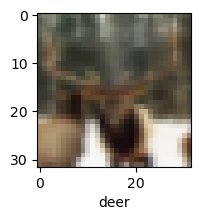

In [75]:
plot_sample(X_test, y_test,26)

In [76]:
classes[y_classes[26]]

'deer'

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [78]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


In [79]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [80]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [81]:
num_epochs = 10
model.fit(train_images, train_labels, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1250/1250 [==============================] - 56s 44ms/step - loss: 1.5033 - accuracy: 0.4515 - val_loss: 1.2359 - val_accuracy: 0.5565
Epoch 2/10
1250/1250 [==============================] - 53s 43ms/step - loss: 1.1436 - accuracy: 0.5907 - val_loss: 1.0775 - val_accuracy: 0.6147
Epoch 3/10
1250/1250 [==============================] - 53s 43ms/step - loss: 0.9692 - accuracy: 0.6591 - val_loss: 1.0483 - val_accuracy: 0.6385
Epoch 4/10
1250/1250 [==============================] - 53s 43ms/step - loss: 0.8463 - accuracy: 0.7029 - val_loss: 0.9440 - val_accuracy: 0.6692
Epoch 5/10
1250/1250 [==============================] - 53s 43ms/step - loss: 0.7463 - accuracy: 0.7382 - val_loss: 0.8986 - val_accuracy: 0.6896
Epoch 6/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.6703 - accuracy: 0.7637 - val_loss: 0.8848 - val_accuracy: 0.6967
Epoch 7/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.5909 - accuracy: 0.7918 - val_loss: 0.9137 -

In [82]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 5s - loss: 0.9992 - accuracy: 0.7089 - 5s/epoch - 14ms/step

Test accuracy: 0.708899974822998


In [83]:
model.path = 'mlproject.h5'
model.save(model.path)
print('Model Path:', model.path)

Model Path: mlproject.h5


C:\Users\Work\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
model = keras.models.load_model('mlproject.h5')
class_labels = {0: 'Cat', 1: 'Dog', 2 : 'Bear', 3 : 'Deer'}

In [85]:
pip install gradio


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gradio as gr
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
from io import BytesIO

model = keras.applications.MobileNetV2(weights="imagenet", include_top=True)

def predict_animal_name(input_image):
    try:
        img = Image.fromarray(input_image)

        img = img.resize((224, 224))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = keras.applications.mobilenet_v2.preprocess_input(img_array)

        predictions = model.predict(img_array)
        decoded_predictions = keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0]

        
        predicted_name = decoded_predictions[0][1]

        return predicted_name

    except Exception as e:
        return f"Error: {e}"

iface = gr.Interface(fn=predict_animal_name, inputs="image", outputs="text")


iface = gr.Interface(
    fn=predict_animal_name,
    inputs="image",
    outputs="text",
    layout="vertical",
    title="Animal Classification",
    description="Enter Image.",
    css='div {margin-left: auto; margin-right: auto; width: 100%;\
            background-image: url("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsJCQcJCQcJCQkJCwkJCQkJCQsJCwsMCwsLDA0QDBEODQ4MEhkSJRodJR0ZHxwpKRYlNzU2GioyPi0pMBk7IRP/2wBDAQcICAsJCxULCxUsHRkdLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCz/wAARCAC0ARIDASIAAhEBAxEB/8QAFwABAQEBAAAAAAAAAAAAAAAAAAECBv/EABsQAQEBAAMBAQAAAAAAAAAAAAABETFRcSFB/8QAFgEBAQEAAAAAAAAAAAAAAAAAAAUB/8QAFBEBAAAAAAAAAAAAAAAAAAAAAP/aAAwDAQACEQMRAD8A7u27fv6m1bzfUSVc29m3sANvZt7ADabQA29m3sANva7e0ANpt7ADabewA2m0ANvZt7ADabewA29rt7QA29m3sANptADb2bewA29m3sANptAF2iAF5voXm+gCKAAAigAigAAIoAIoCCgIoAgoAACKACKgKACKAAAAALeb6heb6ACAKIAogCiAKAAIAogCiAKIAogCgACAKIAoigCAKCAoALeb6heb6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXm+heb6AIoAACKACKAAAigAigIKAigCCgAAIoAIoAACKAAAAAF5voXm+gAICgACKACAoAAigAgKIAoigCAKAAIoAICgACKAAAAC3m+oXm+gAAAAAAAAAAAAAAAAAAAAAAAAAICgAAAAAAAXm+heb6AAAAAAAAAAAAAAAAAAAAAAAAAIoAAAAAAAABeb6F5voAAAAAAAAAAAAAAAAAAAAAAAAAioCgAAAAAAAt5vqF5voACAoAAigAgKAAIoAICiAKIoAgCgACKACAoAAigAAAAXm+i3m+oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADVk2mQBpkMgAZDIAGQyABkMgAZDIAGQyABkMgAZDIAGQyABkMgAZDIAGQyABkTIALkMgAZDIAGQyABkAB//Z"); repeat 0 20;}',
     #background-image:url("");}


)

iface.launch()


C:\Users\Work\AppData\Local\Temp\ipykernel_15376\3828094216.py:33: GradioDeprecationWarning: `layout` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 1s 1s/step
